In [15]:
import pandas as pd

# Load the data
file_path = r"cadeau_node_toy_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
display(df.head())

# Display the schema of the dataframe
display(df.dtypes)

# Summary statistics
display(df.describe())

,id,scoredEmailAddresses_0_address,scoredEmailAddresses_0_relevanceScore,scoredEmailAddresses_0_selectionLikelihood
0,DWqu85JqLF,xueelMH@test.com,44,notSpecified
1,ty2R0dssHF,yW5yDUU@example.com,514,notSpecified
2,nEqaswkaRW,FOHCtDQ@example.com,287,notSpecified
3,60IbiuscLo,vnwkFlW@test.com,840,notSpecified
4,LjyH39D90M,PYg9W6s@example.com,408,notSpecified


id                                            object
scoredEmailAddresses_0_address                object
scoredEmailAddresses_0_relevanceScore          int64
scoredEmailAddresses_0_selectionLikelihood    object
dtype: object

,scoredEmailAddresses_0_relevanceScore
count,11.000000
mean,431.727273
std,305.195377
min,1.000000
25%,261.500000
50%,374.000000
75%,627.000000
max,941.000000


# Regular Node Graph with a Heat Map

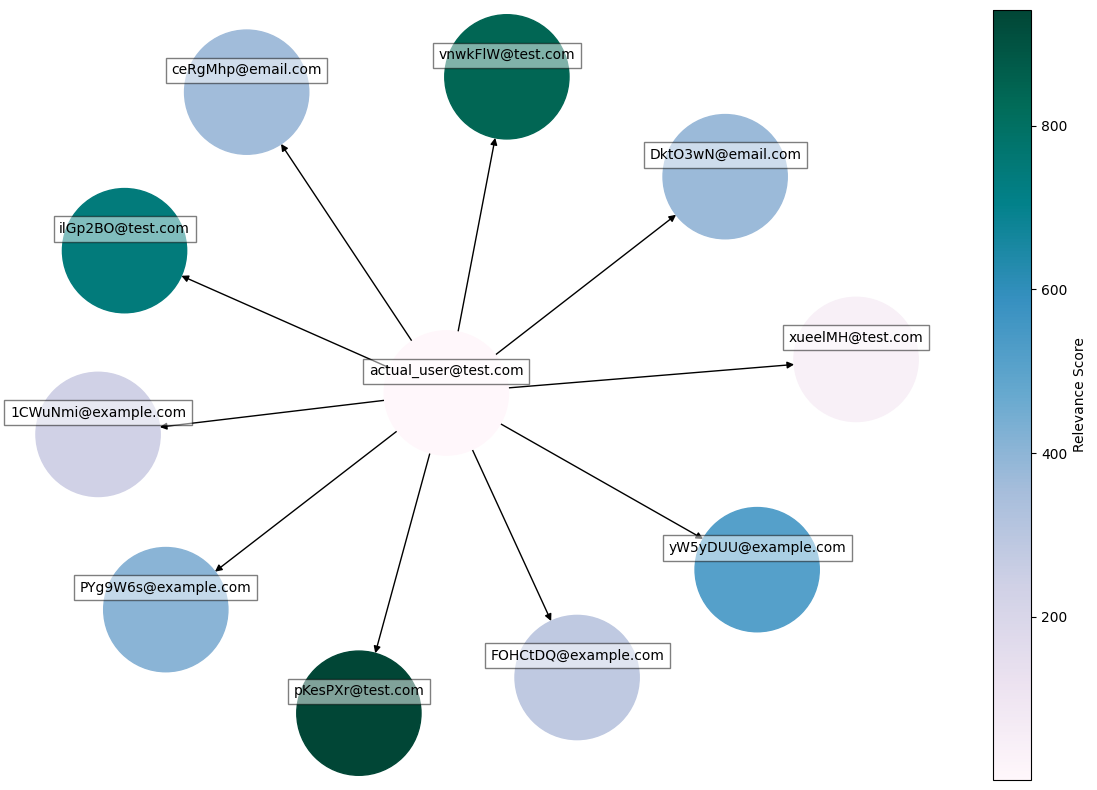

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from builtins import min, max  # Import built-in min and max functions

# Filter the dataframe to get the source and destination nodes
source_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] == 1][["id", "scoredEmailAddresses_0_address"]]
destination_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] != 1][["id", "scoredEmailAddresses_0_address", "scoredEmailAddresses_0_relevanceScore"]]

# Convert the source and destination nodes to lists of dictionaries
source_nodes_list = source_nodes.to_dict('records')
destination_nodes_list = destination_nodes.to_dict('records')

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges to the graph
for source in source_nodes_list:
    for destination in destination_nodes_list:
        G.add_edge(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])

# Create a dictionary for node colors based on relevance score
node_colors = {}
for node in source_nodes_list:
    node_colors[node['scoredEmailAddresses_0_address']] = 1
for node in destination_nodes_list:
    node_colors[node['scoredEmailAddresses_0_address']] = node['scoredEmailAddresses_0_relevanceScore']

# Draw the graph with a heat map for node colors
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G)
nodes = G.nodes()
colors = [node_colors[node] for node in nodes]
nx.draw(
    G, pos, with_labels=False, node_size=8000, node_color=colors, 
    cmap=plt.cm.PuBuGn, vmin=min(colors), vmax=max(colors), ax=ax
)

# Add labels on top of the nodes
for node, (x, y) in pos.items():
    plt.text(
        x, y + 0.05, s=node, bbox=dict(facecolor='white', alpha=0.5), 
        horizontalalignment='center'
    )

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.PuBuGn, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Relevance Score')

plt.tight_layout()
plt.show()


# Size of node dependent on relevanceScore

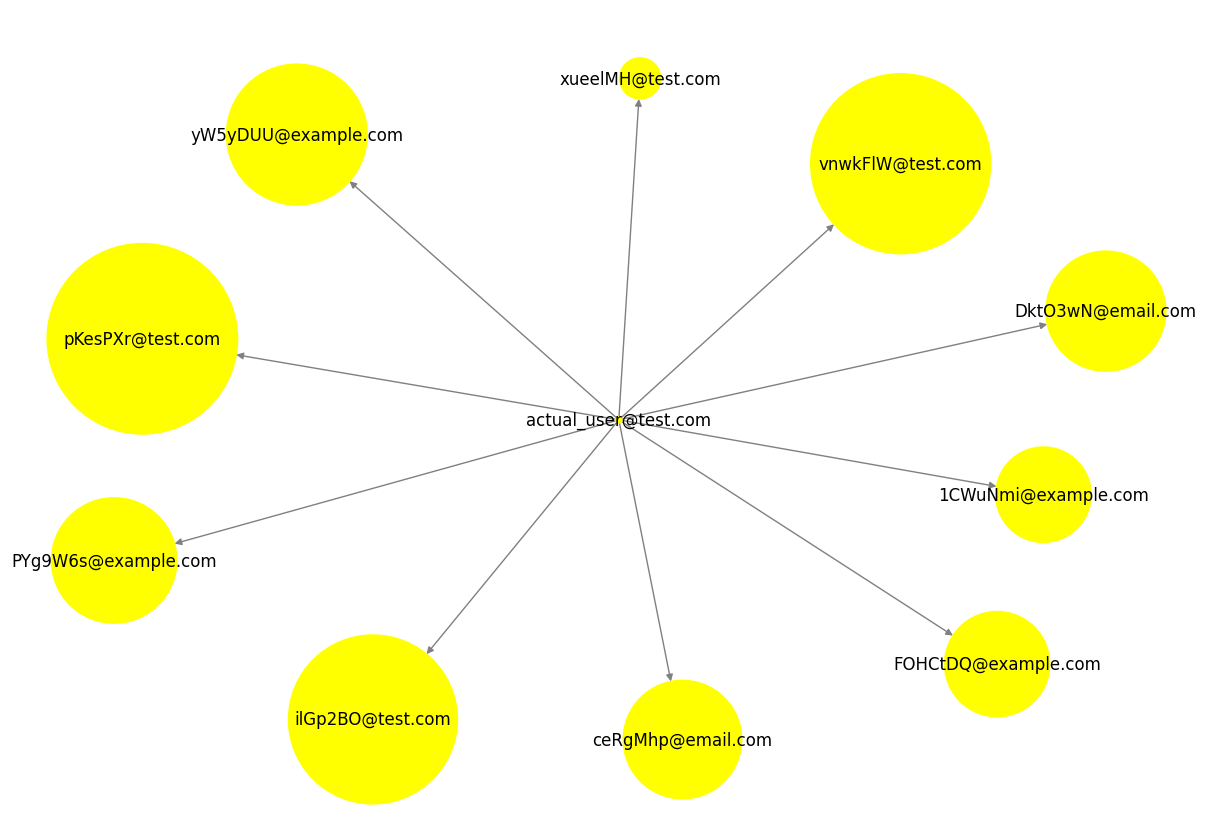

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Filter the dataframe to get the source and destination nodes
source_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] == 1][["id", "scoredEmailAddresses_0_address"]]
destination_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] != 1][["id", "scoredEmailAddresses_0_address", "scoredEmailAddresses_0_relevanceScore"]]

# Create a dictionary for node sizes based on relevance score
node_sizes = {}
for node in source_nodes_list:
    node_sizes[node['scoredEmailAddresses_0_address']] = 20 
for node in destination_nodes_list:
    node_sizes[node['scoredEmailAddresses_0_address']] = node['scoredEmailAddresses_0_relevanceScore'] * 20

# Draw the graph with node sizes representing relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nodes = G.nodes()
sizes = [node_sizes[node] for node in nodes]
nx.draw(G, pos, with_labels=True, node_size=sizes, node_color='yellow', edge_color='gray')
plt.show()



# Heat Map and Node Size

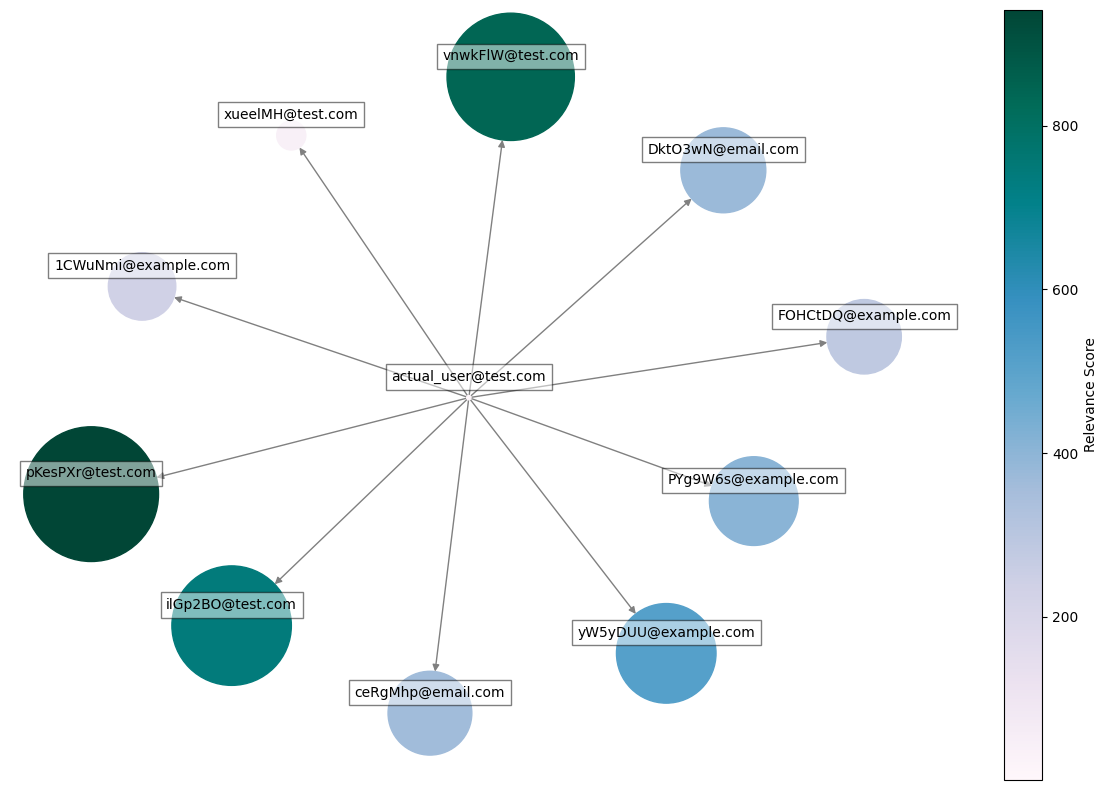

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Filter the dataframe to get the source and destination nodes
source_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] == 1][["id", "scoredEmailAddresses_0_address"]]
destination_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] != 1][["id", "scoredEmailAddresses_0_address", "scoredEmailAddresses_0_relevanceScore"]]

# Collect the source and destination nodes
source_nodes_list = source_nodes.to_dict('records')
destination_nodes_list = destination_nodes.to_dict('records')

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges to the graph
for source in source_nodes_list:
    for destination in destination_nodes_list:
        G.add_edge(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])

# Create dictionaries for node colors and sizes based on relevance score
node_colors = {}
node_sizes = {}
for node in source_nodes_list:
    node_colors[node['scoredEmailAddresses_0_address']] = 1
    node_sizes[node['scoredEmailAddresses_0_address']] = 10
for node in destination_nodes_list:
    node_colors[node['scoredEmailAddresses_0_address']] = node['scoredEmailAddresses_0_relevanceScore']
    node_sizes[node['scoredEmailAddresses_0_address']] = node['scoredEmailAddresses_0_relevanceScore'] * 10

# Draw the graph with a heat map for node colors and sizes representing relevance score
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G)
nodes = G.nodes()
colors = [node_colors[node] for node in nodes]
sizes = [node_sizes[node] for node in nodes]
nx.draw(G, pos, with_labels=False, node_size=sizes, node_color=colors, cmap=plt.cm.PuBuGn, vmin=min(colors), vmax=max(colors), edge_color='gray', ax=ax)

# Add labels on top of the nodes
for node, (x, y) in pos.items():
    plt.text(x, y + 0.05, s=node, bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='center')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.PuBuGn, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Relevance Score')

plt.tight_layout()
plt.show()


# Assess Normality

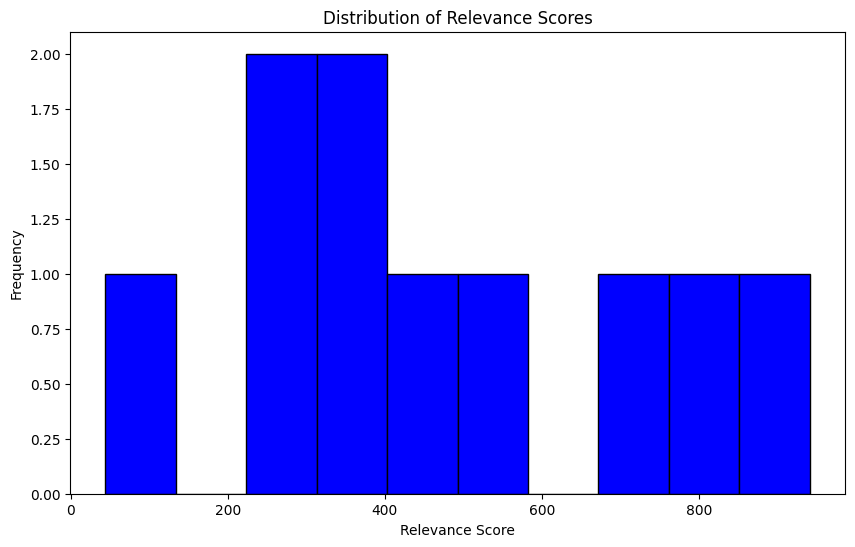

In [5]:
# Plot a histogram for the relevance scores
relevance_scores = df[df["scoredEmailAddresses_0_relevanceScore"] != 1]["scoredEmailAddresses_0_relevanceScore"].tolist()

plt.figure(figsize=(10, 6))
plt.hist(relevance_scores, bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Relevance Scores')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()

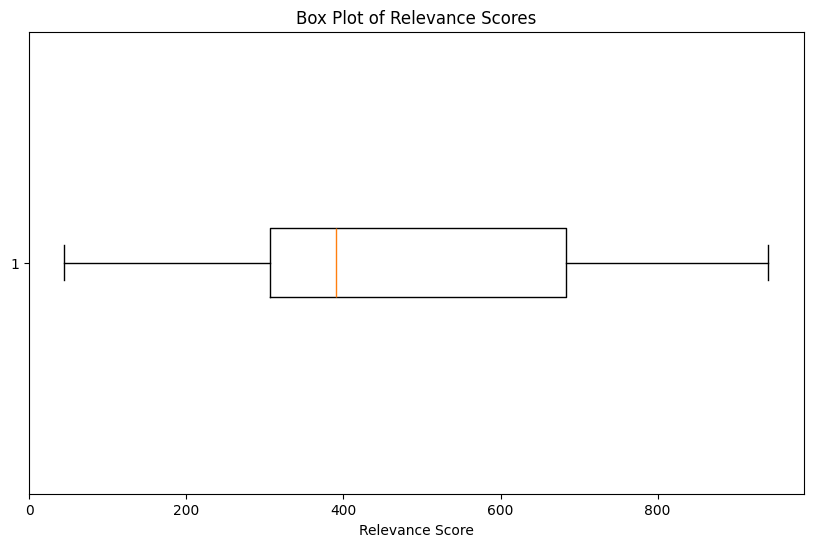

In [6]:
# Plot a box plot for the relevance scores
# Check for symmetry and mean position
import matplotlib.pyplot as plt

relevance_scores = df[df["scoredEmailAddresses_0_relevanceScore"] != 1]["scoredEmailAddresses_0_relevanceScore"].tolist()

plt.figure(figsize=(10, 6))
plt.boxplot(relevance_scores, vert=False)
plt.title('Box Plot of Relevance Scores')
plt.xlabel('Relevance Score')
plt.show()

In [7]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


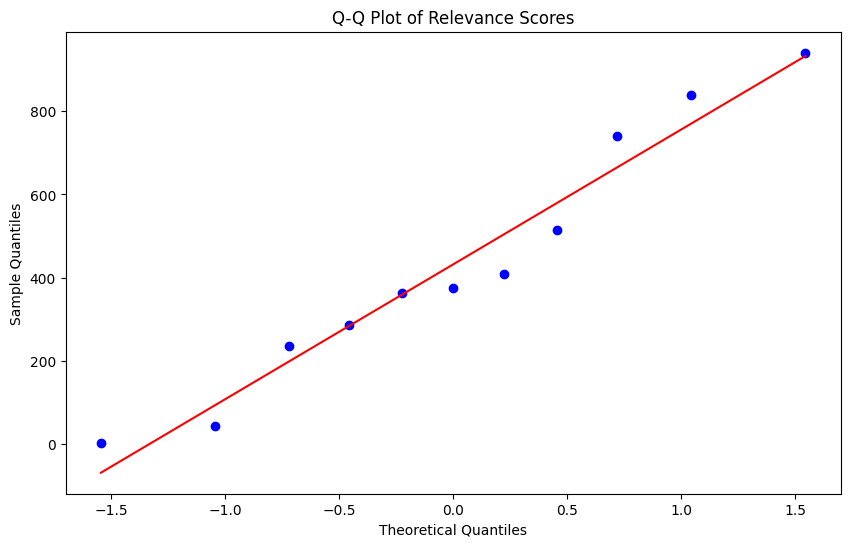

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats

## Check if the data follows the line of best fit, and check for skewness
relevance_scores = df["scoredEmailAddresses_0_relevanceScore"].tolist()

plt.figure(figsize=(10, 6))
stats.probplot(relevance_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot of Relevance Scores')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Edge length dependent on relevanceScore

### Square Root Transformation

- [Quantifying Health: Square Root Transformation](https://quantifyinghealth.com/square-root-transformation/)
- [Your Data Teacher: When and How to Use Power Transform in Machine Learning](https://www.yourdatateacher.com/2021/04/21/when-and-how-to-use-power-transform-in-machine-learning/)

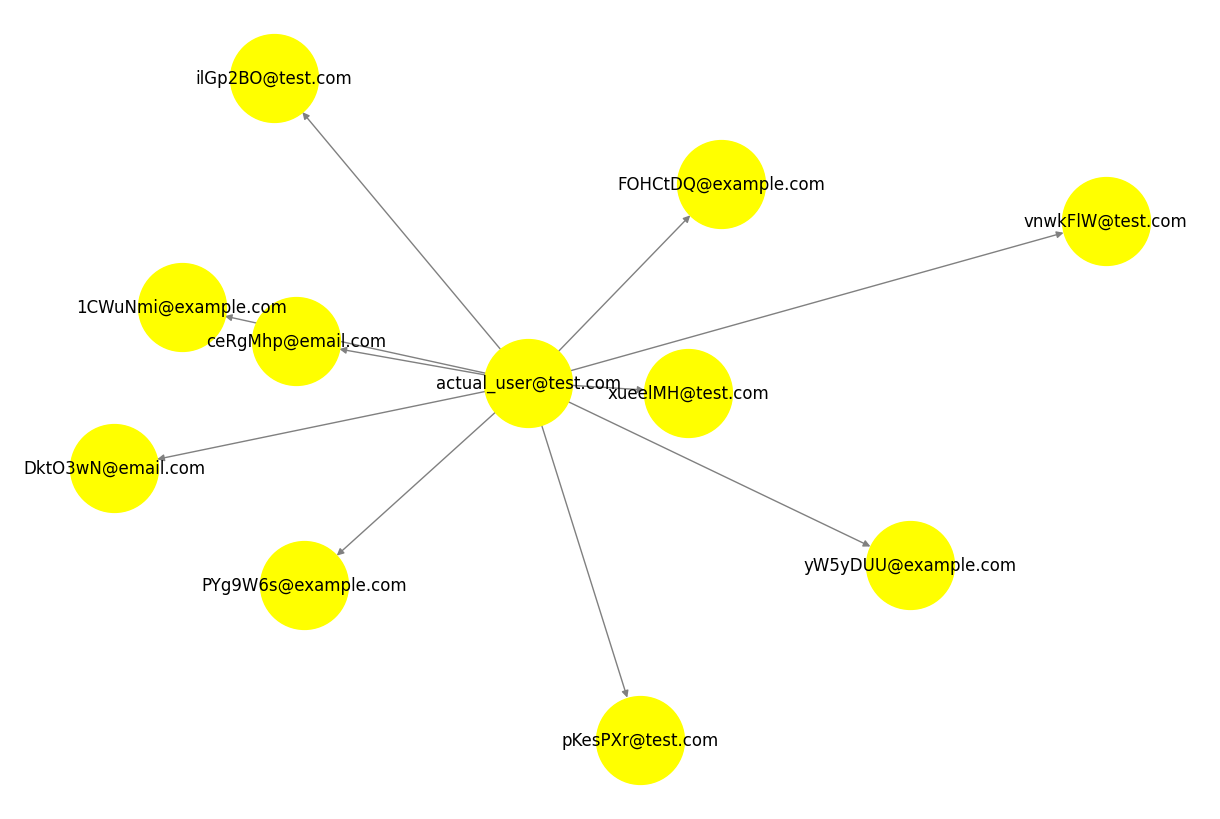

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter the dataframe to get the source and destination nodes
source_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] == 1][["id", "scoredEmailAddresses_0_address"]]
destination_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] != 1][["id", "scoredEmailAddresses_0_address", "scoredEmailAddresses_0_relevanceScore"]]

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges to the graph
for _, source in source_nodes.iterrows():
    for _, destination in destination_nodes.iterrows():
        G.add_edge(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])

# Create a dictionary for edge lengths based on relevance score
edge_lengths = {}
for _, source in source_nodes.iterrows():
    for _, destination in destination_nodes.iterrows():
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = destination['scoredEmailAddresses_0_relevanceScore']

# Draw the graph with edge lengths representing relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    # Power transformation by sqrt will stabilize variance and will be more normally distributed
    # Reduces skewness as well
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]**0.5
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

### Log Transformations

- [You Should Usually Log Transform Your Positive Data](https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/)
- [SAGE Journals: Log Transformation](https://journals.sagepub.com/doi/pdf/10.1177/00045632211050531)

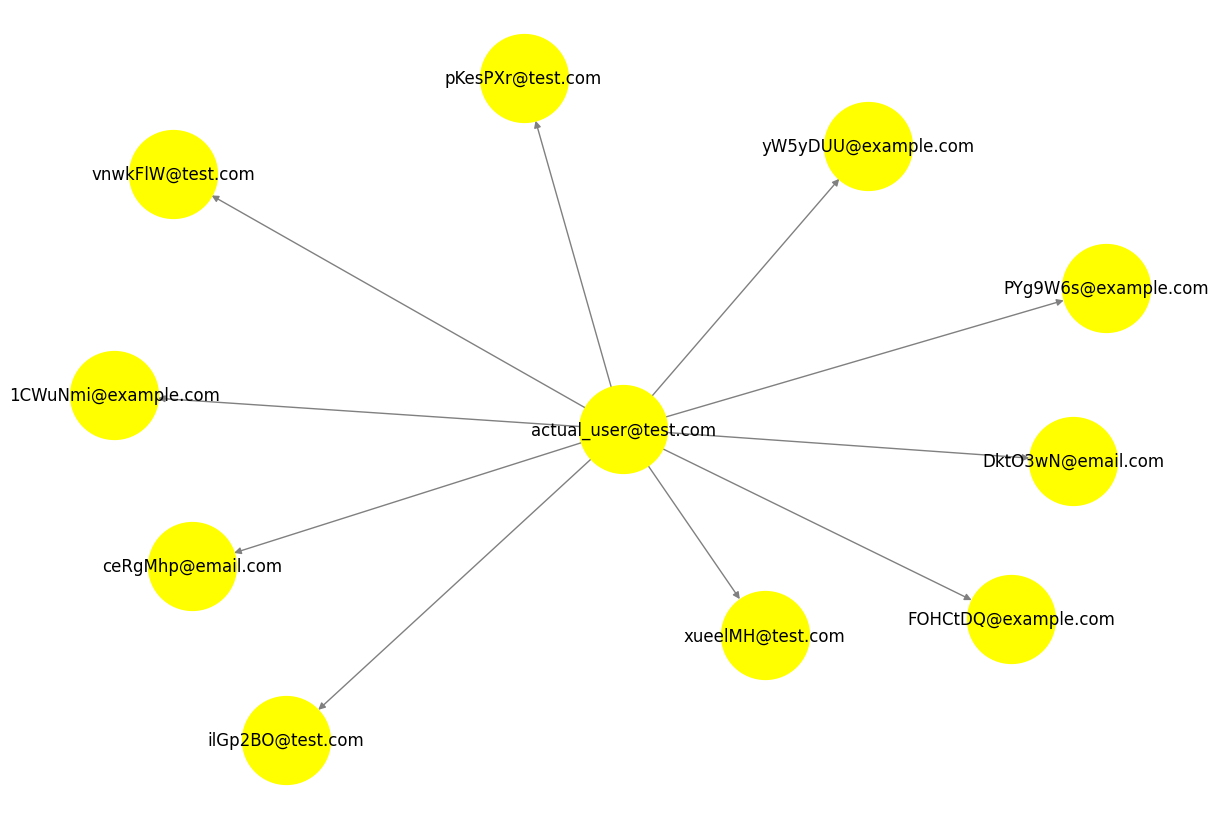

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Filter the dataframe to get the source and destination nodes
source_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] == 1][["id", "scoredEmailAddresses_0_address"]]
destination_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] != 1][["id", "scoredEmailAddresses_0_address", "scoredEmailAddresses_0_relevanceScore"]]

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges to the graph
for _, source in source_nodes.iterrows():
    for _, destination in destination_nodes.iterrows():
        G.add_edge(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])

# Create a dictionary for edge lengths based on log-transformed relevance score
# Our goal is to have more validity, additivity, and linearity
edge_lengths = {}
for _, source in source_nodes.iterrows():
    for _, destination in destination_nodes.iterrows():
        log_score = math.log(destination['scoredEmailAddresses_0_relevanceScore'] + 1)
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = log_score

# Draw the graph with edge lengths representing log-transformed relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

### Box-Cox Transformation

- [The Box-Cox Transformation: What It Is and How to Use It](https://leanscape.io/the-box-cox-transformation-what-it-is-and-how-to-use-it/)
- https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_%28Lane%29/16%3A_Transformations/16.04%3A_Box-Cox_Transformations

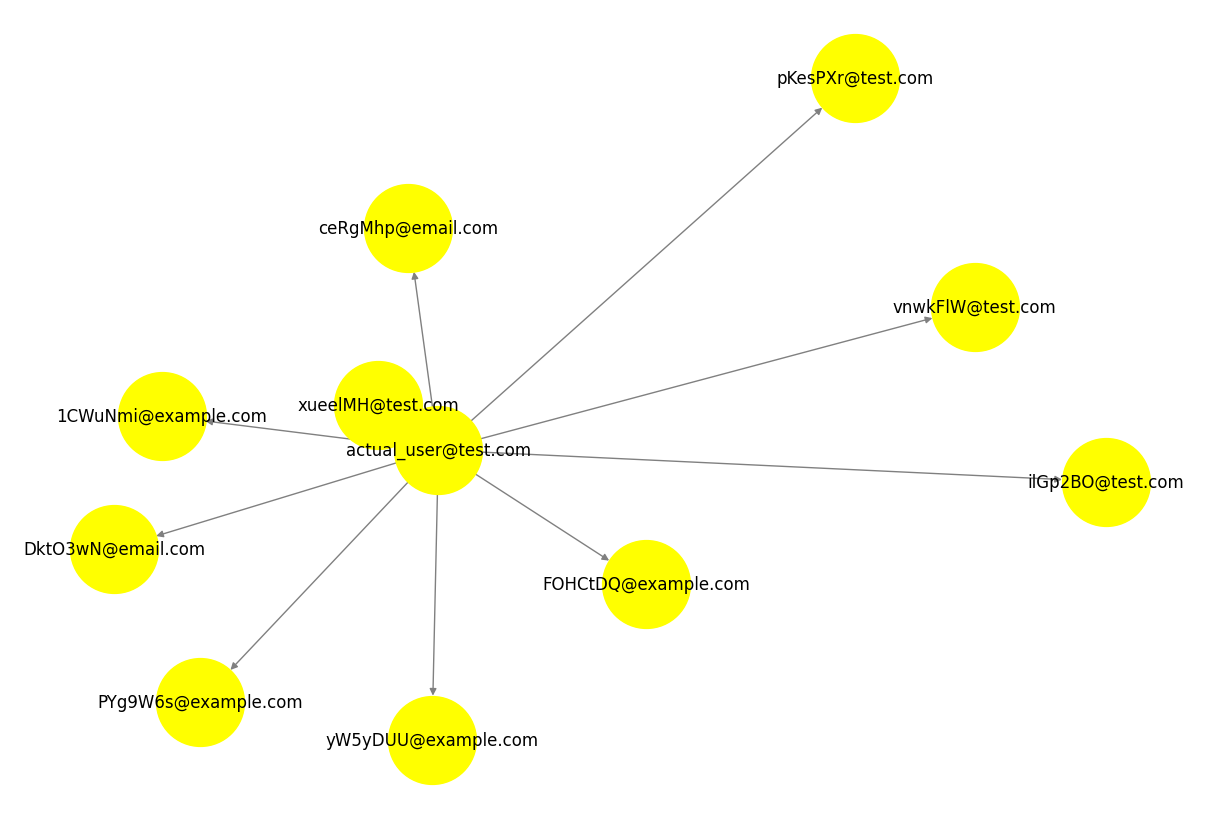

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Filter the dataframe to get the source and destination nodes
source_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] == 1][["id", "scoredEmailAddresses_0_address"]]
destination_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] != 1][["id", "scoredEmailAddresses_0_address", "scoredEmailAddresses_0_relevanceScore"]]

# Collect the source and destination nodes
source_nodes_list = source_nodes.to_dict('records')
destination_nodes_list = destination_nodes.to_dict('records')

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges to the graph
for source in source_nodes_list:
    for destination in destination_nodes_list:
        G.add_edge(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])

# Extract relevance scores for Box-Cox transformation
relevance_scores = [row['scoredEmailAddresses_0_relevanceScore'] for row in destination_nodes_list]

# Apply Box-Cox transformation
# Transforms non-normal data into a normal distribution. This transformation can improve the accuracy of predictions
transformed_scores, _ = boxcox(relevance_scores)

# Create a dictionary for edge lengths based on Box-Cox transformed relevance score
edge_lengths = {}
for i, source in enumerate(source_nodes_list):
    for j, destination in enumerate(destination_nodes_list):
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = transformed_scores[j]

# Draw the graph with edge lengths representing Box-Cox transformed relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

### Ranked Transformation

- [What Is Rank Transformation?](https://statisticseasily.com/glossario/what-is-rank-transformation/)

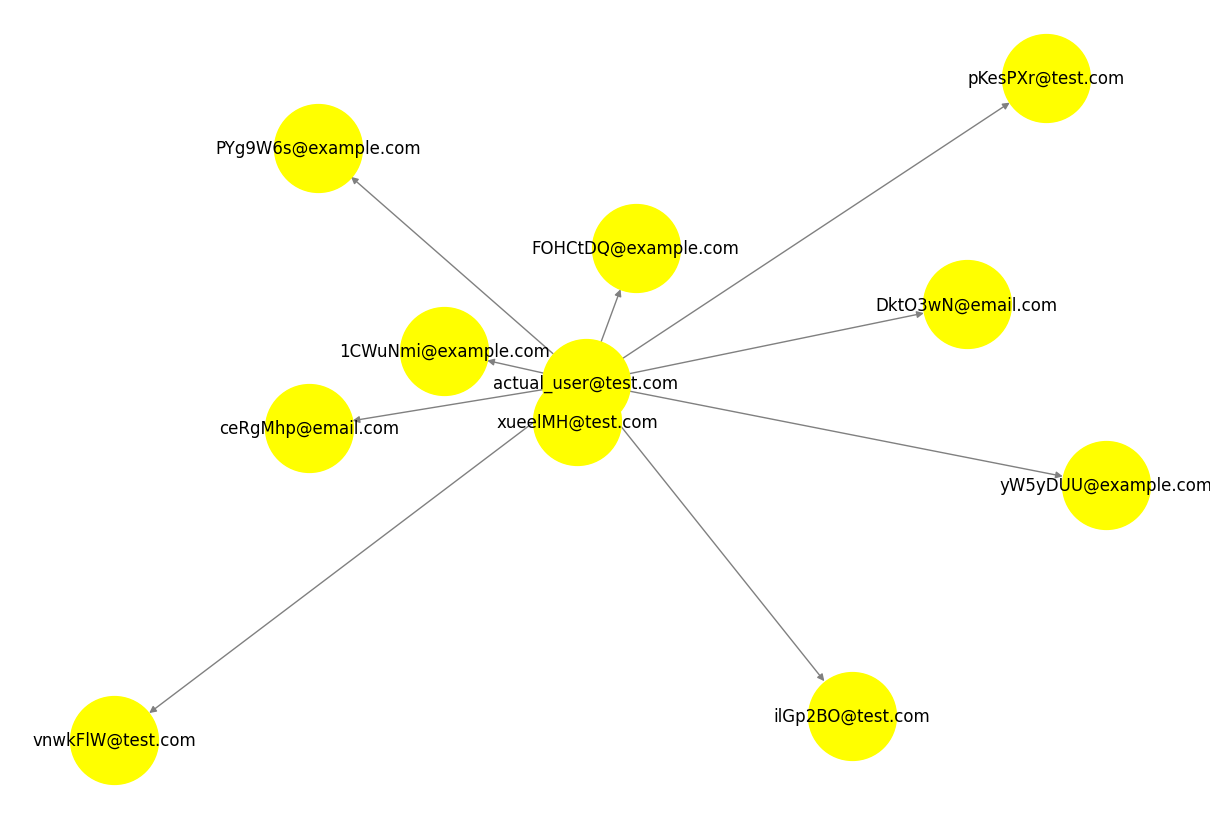

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataframe to get the source and destination nodes
source_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] == 1][["id", "scoredEmailAddresses_0_address"]]
destination_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] != 1][["id", "scoredEmailAddresses_0_address", "scoredEmailAddresses_0_relevanceScore"]]

# Apply rank transformation to relevance scores
# Use when dealing with non-parametric data or when the assumptions of normality in parametric tests are not met
destination_nodes['ranked_relevance_score'] = destination_nodes['scoredEmailAddresses_0_relevanceScore'].rank()

# Collect the source and destination nodes
source_nodes_list = source_nodes.to_dict('records')
destination_nodes_list = destination_nodes.to_dict('records')

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges to the graph
for source in source_nodes_list:
    for destination in destination_nodes_list:
        G.add_edge(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])

# Create a dictionary for edge lengths based on ranked relevance score
edge_lengths = {}
for source in source_nodes_list:
    for destination in destination_nodes_list:
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = destination['ranked_relevance_score']

# Draw the graph with edge lengths representing ranked relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

# Standardized Approach


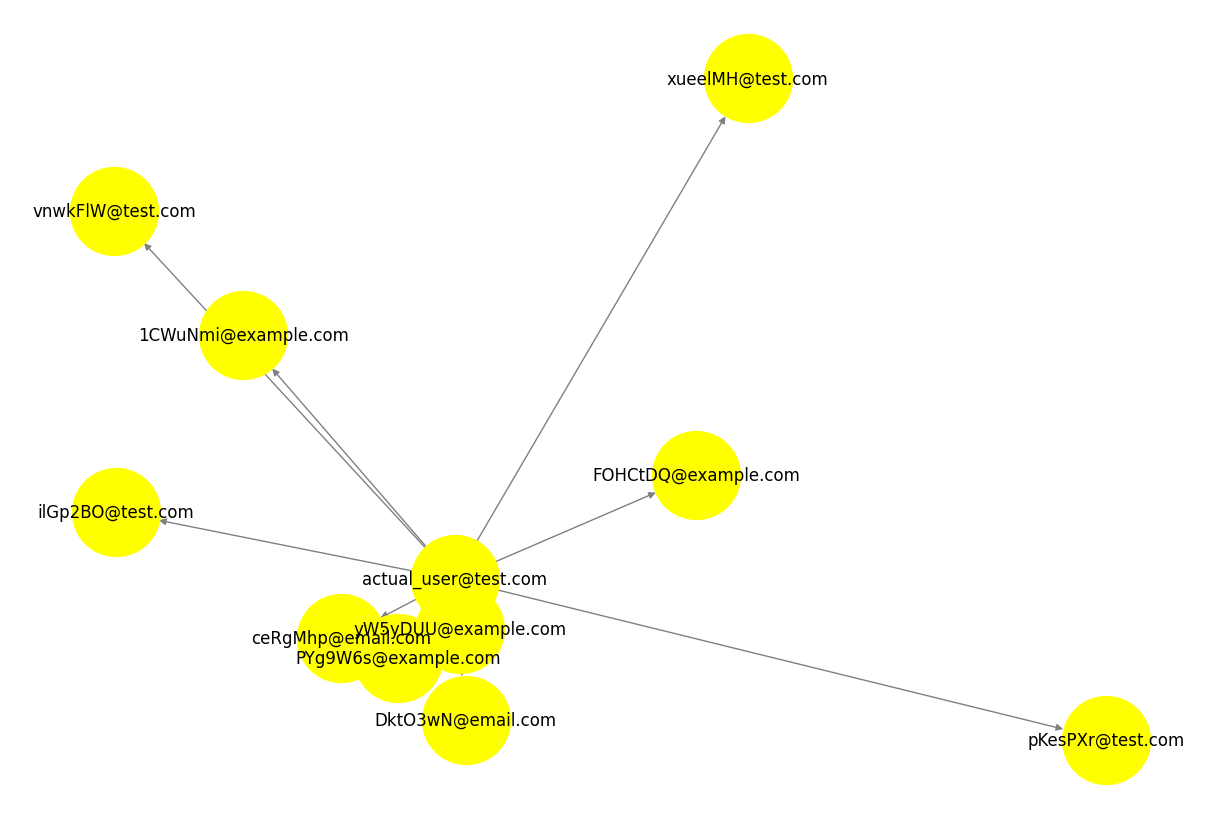

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, mean, stddev

# Filter the dataframe to get the source and destination nodes
source_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] == 1][["id", "scoredEmailAddresses_0_address"]]
destination_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] != 1][["id", "scoredEmailAddresses_0_address", "scoredEmailAddresses_0_relevanceScore"]]

# Collect the source and destination nodes
source_nodes_list = source_nodes.to_dict('records')
destination_nodes_list = destination_nodes.to_dict('records')

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges to the graph
for source in source_nodes_list:
    for destination in destination_nodes_list:
        G.add_edge(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])

# Calculate mean and standard deviation of relevance scores
mean_relevance = destination_nodes["scoredEmailAddresses_0_relevanceScore"].mean()
stddev_relevance = destination_nodes["scoredEmailAddresses_0_relevanceScore"].std()

# Create a dictionary for edge lengths based on standardized relevance score
edge_lengths = {}
for source in source_nodes_list:
    for destination in destination_nodes_list:
        standardized_score = (destination['scoredEmailAddresses_0_relevanceScore'] - mean_relevance) / stddev_relevance
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = standardized_score

# Draw the graph with edge lengths representing standardized relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

# Normalized Approach

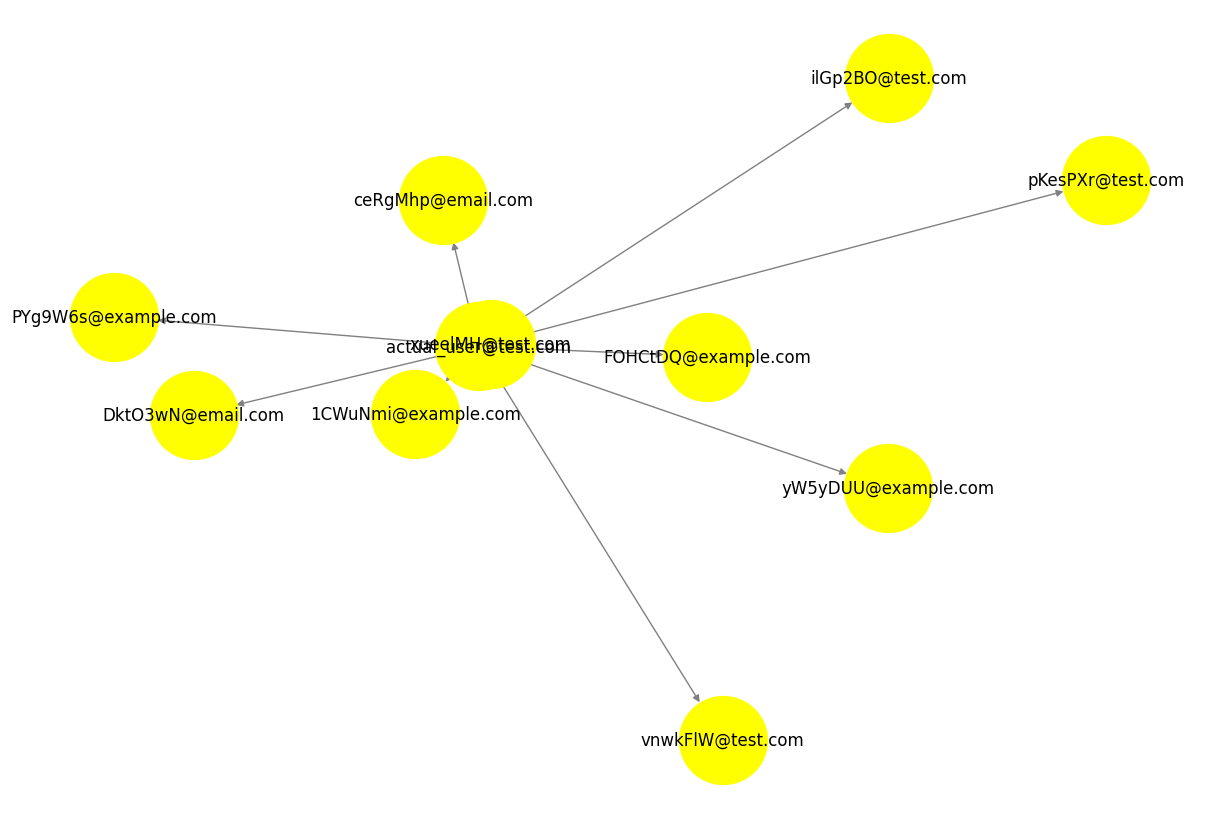

In [14]:
# Calculate min and max of relevance scores
min_relevance = destination_nodes["scoredEmailAddresses_0_relevanceScore"].min()
max_relevance = destination_nodes["scoredEmailAddresses_0_relevanceScore"].max()

# Create a dictionary for edge lengths based on normalized relevance score
edge_lengths = {}
for source in source_nodes_list:
    for destination in destination_nodes_list:
        normalized_score = (destination['scoredEmailAddresses_0_relevanceScore'] - min_relevance) / (max_relevance - min_relevance)
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = normalized_score

# Draw the graph with edge lengths representing normalized relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()